# Signals and Systems for Dummies, Chapter 8

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import mplcursors

# %matplotlib ipympl
%matplotlib inline

In [12]:
fc = 440
Tc = 1/fc
Ts = Tc/50

fmod = 5
Tmod = 1/5
d = 1*Tmod

t = np.linspace(0, d, np.round(d/Ts).astype("int"))

xmod = np.cos(2*np.pi*fmod*t)
x = np.cos(2*np.pi*fc*t)*xmod
# x = np.cos(2*np.pi*(fc+fmod)*t) + np.cos(2*np.pi*(fc-fmod)*t)

Text(0.5, 1.0, '440Hz x 5Hz')

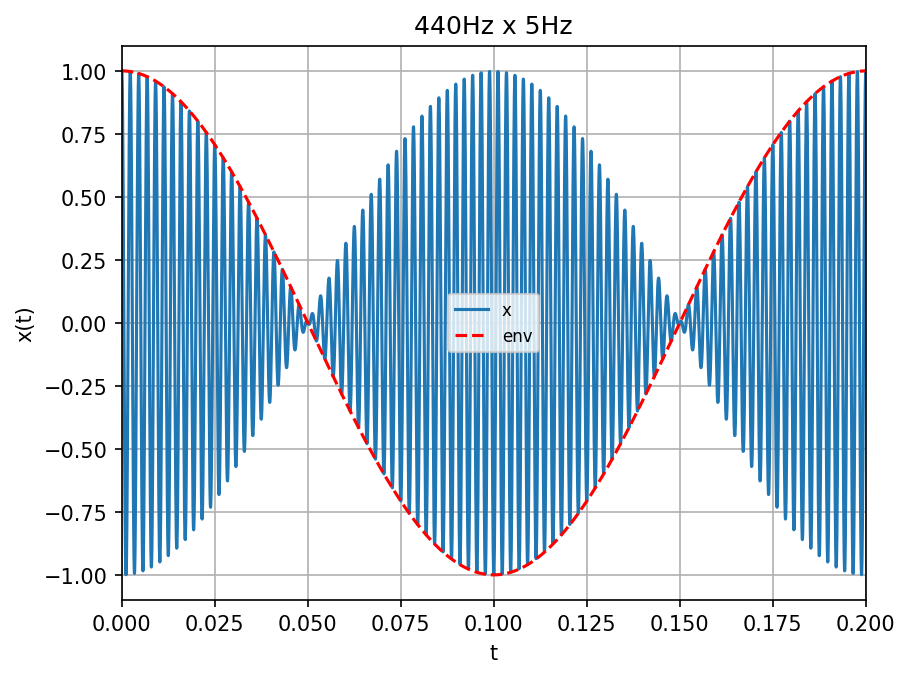

In [18]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, xmod, 'r--', label="env")
# ax.plot(t, -xmod, 'r--')
ax.set_xlim(left=0, right=d)
ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
ax.set_title("440Hz x 5Hz")